<a href="https://colab.research.google.com/github/jinesh90/MLNotebooks/blob/master/PHYS243_Homework3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS243: Homework 3

## Problem 1: Linear Regression

In [222]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

In [223]:
# upload data file from local machine
from google.colab import files
from IPython import display
uploaded = files.upload()

Saving birthrate.dat to birthrate.dat


### 1) Find the best model parameters using gradient descent and assuming least square loss function

For the best fit parameters finding, we are following these steps

Assume linear relationship of function Y = β0​x0​+β1​x1​+β1​x2​+…+βn​xn​
 or in general Y = w.X + b

define loss function as loss = (1/2n) * Σ (y_pred - y) ** 2

and find partial derivative (gradient) of W an b and adjust value called theta

at each step 

where 
dtheta = -(1/m)* learning_rate * Σ X*((y_pred - y) ** 2)



In [327]:
# read data from file

fp = open("birthrate.dat").read()
df = pd.read_fwf(StringIO(fp),sep="\s+", header=None)


In [328]:
# check data frame
df.head()

,0,1,2,3,4
0,Venezuela,46.4,392,0.40,68.5
1,Mexico,45.7,118,0.61,87.8
2,Ecuador,45.3,44,0.53,115.8
3,Colombia,38.6,158,0.53,106.8
4,Ceylon,37.2,81,0.53,71.6


In [329]:
# chnage column name as per data
df = df.rename(columns={0:"nation",1:"birth_rate",2:"per_capita_income",3:"proportion_of_population_of_farms",4:"infant_mortality_rate"})
df.head()

,nation,birth_rate,per_capita_income,proportion_of_population_of_farms,infant_mortality_rate
0,Venezuela,46.4,392,0.40,68.5
1,Mexico,45.7,118,0.61,87.8
2,Ecuador,45.3,44,0.53,115.8
3,Colombia,38.6,158,0.53,106.8
4,Ceylon,37.2,81,0.53,71.6


In [330]:
# Data preprocessing, divide data into features and target for linear regression
X = df.values[:,2:5]
y = df.values[:,1]
print("Shape of features is: {}, shape of target is:{}".format(X.shape,y.shape))

# convert object data to float
X = np.array(X,dtype="float")
y = np.array(y,dtype="float")

Shape of features is: (29, 3), shape of target is:(29,)


We need Y = X0W0 + X1W1 format notice here X0 is missing here so adding X0 as array


In [331]:
# adding in 1's X first column
X = np.c_[np.ones(X.shape[0]),X]

In [332]:
# check X,y
X[:2],y[:2]

(array([[  1.  , 392.  ,   0.4 ,  68.5 ],
        [  1.  , 118.  ,   0.61,  87.8 ]]), array([46.4, 45.7]))

Lets find Fitted parameters by matrix inverse method, so we can verify our answer with gradient descent later

In [333]:
# using matrix inverse method
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("best fitted params by matrix method is: {}".format(theta_best))

best fitted params by matrix method is: [6.17713470e+00 5.53043266e-03 8.79467539e+00 2.38888103e-01]


In [355]:
# set random seed for cosistant result
np.random.seed(22)

In [356]:
# Now lets define loss function 
def least_square_loss(X,y,w):
  m = len(y)
  n = len(w)

  # reshape for matching dimetions
  y = np.reshape(y,(m,1))
  w = np.reshape(w,(n,1))

  # error 
  error = X.dot(w) - y

  # calculate loss
  loss = (1/m) * error.T.dot(error)
  return loss

In [357]:
# get theta loss fuunction
def theta_loss(theta):
  return least_square_loss(X,y,theta)

In [358]:
# define cost function
def gradient_cost_function(X,y,w):
  m = len(y)
  n = len(w)

  # reshape for dot product
  y = np.reshape(y,(m,1))
  w = np.reshape(w,(n,1))

  loss = X.dot(w) - y

  total_loss = (2/m) * X.T.dot(loss)
  return total_loss

In [359]:
# now define gradient descent function
def gradient_descent(X,y,lr=0.1,iteration=100):
  m = len(y)
  # since X has 4 dimetions(features)
  theta = np.random.randn(4,1)

  # for tracking errors
  theta_list = []

  # start itertion
  for i in range(iteration):
    gradients = gradient_cost_function(X, y, theta)
    theta = theta - lr * gradients
    theta_list.append(theta)
  return theta, theta_list

In [414]:
# Now for gradient descent, we have not use normalization on data so start with very small learning steps
rate = 2.e-6
iter_ = 100
theta_100, theta_list_100 = gradient_descent(X,y, lr= rate, iteration=iter_)
print("model params for lr:{} and iteration: {} is :{}".format(rate,iter_,theta_100))

model params for lr:2e-06 and iteration: 100 is :[[-1.37679831]
 [ 0.00873834]
 [ 0.54175654]
 [ 0.4239081 ]]


### 2) Plot the loss function versus steps of the gradient descent.

In [419]:
def plot_loss_function_vs_iteration_graph(params_list):
  loss_iter = []
  for i in params_list:
    loss_iter.append(theta_loss(i))
  loss_point = [p[0] for p in loss_iter]
  plt.title(r"gradient descent")
  fig_1 = plt.plot(range(1, len(loss_point)+1), loss_point,  c = "blue")
  plt.ylabel(r"Loss Function")
  plt.xlabel(r"Number of iterations")

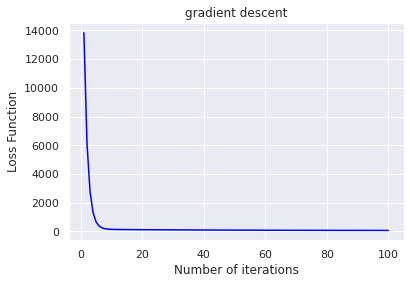

In [420]:
# now plot the loss vs iteration
plot_loss_function_vs_iteration_graph(theta_list_100)

### 3) Predict the birth in Canada using the following values: Per Capita Income: 993 Proportion of population on farms: 0.19 Infant Mortality Rate: 33.7

In [433]:
# predict birth rate in canada based on gradient descent value
canada_vector = np.array([1,993.0,0.19,33.7]).reshape(-1,1)

# get dot product
birth_rate_for_canada = np.dot(theta_100.T,canada_vector)[0][0]
print("Predicted birth rate of canada by using best params of gradient descent is :{}".format(birth_rate_for_canada))

# to verify this value, lets check with theta_best by inverse matrix

birth_rate_for_canada_matrix_inv =  np.dot(theta_best.T,canada_vector)[0]
print("Predicted birth rate of canada by using matrix inverse is :{}".format(birth_rate_for_canada_matrix_inv))

Predicted birth rate of canada by using best params of gradient descent is :21.68900980076026
Predicted birth rate of canada by using matrix inverse is :21.390371720084907


**Final Conclusion for Problem 1**
* Predicted value for birth rate is : **21.68**
* We can see by using gradient descent and matrix inv, both value is near ~21.5
* Hence we can say parameter we found is appropriate.

## Problem 2: Logistic Regression
The following figure shows the dataset with two features and a binary classification (color).
1. Divide the data into 70/30 percent for training/testing.
2. Find the best parameter of the logistic function assuming a cross-entropy loss and using
one of the optimization techniques.
3. Find the performance of your trained model on the testing dataset.

### 1) Divide the data into 70/30 percent for training/testing.

In [130]:
# Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# for pretty plots
sns.set()

In [2]:
# data file upload from local machine
# For .csv file upload.
from google.colab import files
uploaded = files.upload()

Saving logistic_reg.csv to logistic_reg.csv


In [3]:
# Open file as dataframe
df = pd.read_csv("logistic_reg.csv")

In [4]:
# check data
df.head(5)

,Unnamed: 0,X1,X2,y
0,0,3.206197,3.256028,1
1,1,-3.801475,0.203568,1
2,2,2.540271,2.380449,1
3,3,3.442366,3.552647,1
4,4,-2.672117,1.791972,1


In above data we can see, there is a column called Unnamed: 0, we need to drop it since it is not being used.

In [5]:
# drop unwanted column
df.drop(columns=["Unnamed: 0"],inplace=True)
df.columns

Index(['X1', 'X2', 'y'], dtype='object')

In [6]:
df.head(5)

,X1,X2,y
0,3.206197,3.256028,1
1,-3.801475,0.203568,1
2,2.540271,2.380449,1
3,3.442366,3.552647,1
4,-2.672117,1.791972,1


now data looks ok

In [7]:
# lets define features as X and classification target as y
features = [col for col in df.columns if col != 'y']
X = df[features]
y = df["y"]

In [8]:
# features
X

,X1,X2
0,3.206197,3.256028
1,-3.801475,0.203568
2,2.540271,2.380449
3,3.442366,3.552647
4,-2.672117,1.791972
...,...,...
195,-5.127668,4.144140
196,2.734946,-3.434546
197,1.701252,-4.612408
198,3.190381,3.121165


In [9]:
# class
y

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    0
197    0
198    1
199    1
Name: y, Length: 200, dtype: int64

we have total 200 data points and we need to split these points into 70:30 % ratio for training/testing

In [24]:
# set ranom seed  for producing consistant results.
np.random.seed(22)

# define function that returns splitting data
def split_train_test(data,ratio):
  # need to select random indexes for data
  random_indexes = np.random.permutation(len(data))
  #print(random_indexes)
  # select test iloc indexes
  test_size = int(len(data) * ratio)
  # select train iloc indexes
  test_index = random_indexes[:test_size]
  train_index = random_indexes[test_size:]
  return data.iloc[train_index],data.iloc[test_index]

In [25]:
# spit train,test data based on give ratio
train_data,test_data = split_train_test(df,0.3)
print("After splitting train data size:{}".format(len(train_data)))
print("After splitting test data size:{}".format(len(test_data)))

After splitting train data size:140
After splitting test data size:60


In [26]:
# divide set furture into X_train,y_train,X_test,y_test
X_train = train_data[features]
y_train = train_data["y"]
X_test = test_data[features]
y_test = test_data["y"]

Splitting done with train and test data set.

In [28]:
# check sample
X_train

,X1,X2
197,1.701252,-4.612408
2,2.540271,2.380449
54,1.718974,1.547173
118,-3.856610,-3.692406
181,-2.955009,3.567634
...,...,...
100,-2.444857,2.773957
192,-3.902223,2.391065
44,1.639006,-4.744125
132,4.682556,4.888719


In [30]:
# check target class sample
y_train

197    0
2      1
54     1
118    0
181    1
      ..
100    1
192    1
44     0
132    1
117    1
Name: y, Length: 140, dtype: int64

### 2) Find the best parameter of the logistic function assuming a cross-entropy loss and using one of the optimization techniques.

Here are some points that used for developing best fit params for logistic regression

Assume logistic regression is outputed by **Sigmoid** function ( which gives probablity of  class) which is formulated by
 
 *σ(x) = 1 / (1 + e^-x), x is input vector* output range of sigma(x) will be [0,1] in our case
 
For this function we will select **Binary Cross Entropy** for cost/error function which is given by following equation

We will use **gradient descent** optimiztion technique for finding best params

Binary Cross Entropy Loss = - (1/n) Σ y log (y_pred) + (1-y) log (1-y_pred)

where y_pred = sigmoid(y)

once we have loss function, we can find derivative of it wrt W and B .

dw = partial derivate of Loss wrt w

db = partial derivative of Loss wrt b

dw = (2/n) Σ X *(y_pred - y)

db = (2/n) Σ ( y_pred - y)

W_new = w - learning_rate * dw

b_new = b - learning_rate * db

Now, lets implement all of these steps



In [113]:
# Lets  define sigmoid function first 
def sigmoid(x):
  """
  this return probablity of class.
  """
  return 1 / (1 + np.exp(-x))

In [114]:
# Now define binary cross entropy function.
def binay_cross_entropy_loss(X, y, weights, bias):
  """
  binary cross entropy function, gives loss for class prediction
  """
  op = np.dot(X, weights) + bias
  loss = - np.sum((y * np.log(sigmoid(op))) + ((1 - y) * np.log(1 - sigmoid(op)))) / len(X)
  return loss

In [115]:
# Define logistic regression with gradient descent

def logistic_regression(X,y,learning_rate=0.1,iteration=1000):
  """
  logistic regression main function, gives optimal weights,bias and loss functions array
  """
  # intialized W,bias and loss array for each steps
  W = np.zeros(X.shape[1])
  b = 0
  bce_loss = []
  for i in range(iteration):
    # during iteration, get prediction probablity
    prediction =  np.dot(X, W) + b
    class_probablity = sigmoid(prediction)
    # print(class_probablity)

    # get partial  derivatives for w and b
    dw = (1 / X.shape[0]) * (2 * np.dot(X.T, (class_probablity - y)))
    db = (1 / X.shape[0]) * (2 * np.sum(class_probablity - y))

    # update weight and bias with partial derivative
    W = W - learning_rate * dw
    b = b - learning_rate * db

    # append calculated loss for function
    bce_loss.append(binay_cross_entropy_loss(X,y,W,b))
  
  # return optiml W and b after give iterations
  return W,b,bce_loss

In [210]:
# lets choose learning rate 0.1 and vary iterations
W_,b_,loss_ = logistic_regression(X_train,y_train,learning_rate=0.1,iteration=1000)
W_100,b_100,loss_100 = logistic_regression(X_train,y_train,learning_rate=0.1,iteration=100)
W_50,b_50,loss_50 = logistic_regression(X_train,y_train,learning_rate=0.1,iteration=50)

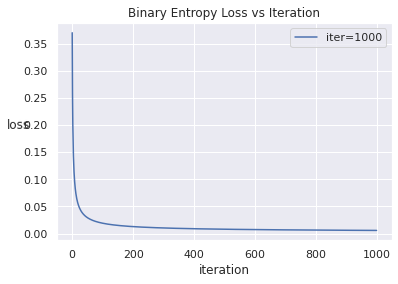

In [211]:
# now plot for iter vs loss
plt.plot([x for x in range(1000)],loss_,label="iter=1000");
plt.title(r"Binary Entropy Loss vs Iteration")
plt.xlabel(r"iteration")
plt.ylabel(r"loss", rotation=1,)
plt.legend()
plt.show() 

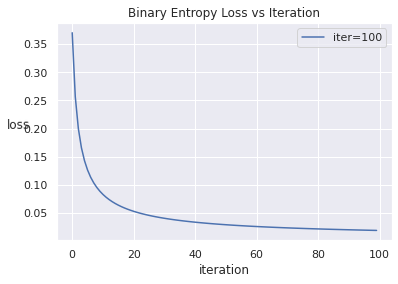

In [209]:
plt.plot([x for x in range(100)],loss_100,label="iter=100");
plt.title(r"Binary Entropy Loss vs Iteration")
plt.xlabel(r"iteration")
plt.ylabel(r"loss", rotation=1,)
plt.legend()
plt.show()

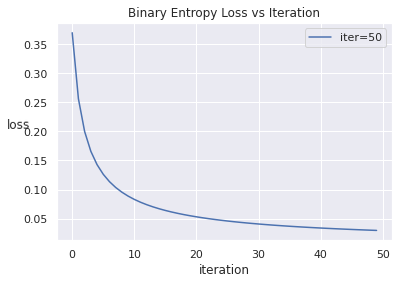

In [208]:
plt.plot([x for x in range(50)],loss_50,label="iter=50");
plt.title(r"Binary Entropy Loss vs Iteration")
plt.xlabel(r"iteration")
plt.ylabel(r"loss", rotation=1,)
plt.legend()
plt.show()

In [206]:
# lets choose learning rate 0.1,0.01,0.005 @ 100 iteration
W_1,b_1,loss_1 = logistic_regression(X_train,y_train,learning_rate=0.1,iteration=100)
W_0_1,b_0_1,loss_0_1 = logistic_regression(X_train,y_train,learning_rate=0.01,iteration=100)
W_0_0_5,b_0_0_5,loss_0_0_5 = logistic_regression(X_train,y_train,learning_rate=0.005,iteration=100)

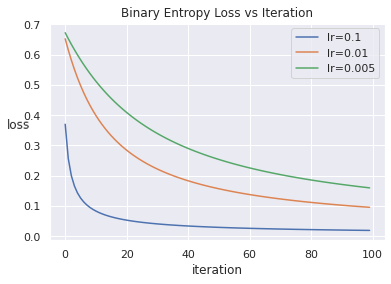

In [207]:
# plot observation

plt.title(r"Binary Entropy Loss vs Iteration")
plt.xlabel(r"iteration")
plt.ylabel(r"loss", rotation=1,)
plt.plot([x for x in range(100)],loss_1,label="lr=0.1");
plt.plot([x for x in range(100)],loss_0_1,label="lr=0.01");
plt.plot([x for x in range(100)],loss_0_0_5,label="lr=0.005");
plt.legend()
plt.show()

By observing above anaylsis, lets select iteration 200 and lr 0.1 for obtaining optimal params

In [214]:
# Final params selection
W_,b_,loss_ = logistic_regression(X_train,y_train,learning_rate=0.1,iteration=200)

In [434]:
# final params for logistic regression is 
print("Weight is :{} and bias is:{}".format(W_,b_))

Weight is :[-0.05398017  2.27177073] and bias is:0.04807045488968703


### 3) Find the performance of your trained model on the testing dataset.
Now we will use our best parameters for finding prediction on remaining data on test set and 

In [217]:
def predict(X,W,b):
  """
  predict unknown X value for given params
  """
  op = np.dot(X,W) + b
  pred_probablity = sigmoid(op)
  # trigger sigmoid function in case of prob value  more than 0.5, Note: this can be change as per requirement.
  prediction = [1 if i > 0.5 else 0 for i in pred_probablity]
  return prediction

In [218]:
# now get prediction for y_test
y_pred = predict(X_test,W_,b_)

In [219]:
# Now check performance of model for given parameters , W_ and b_
def accuracy(y,y_pred):
  matched_class = 0
  for i,j in zip(y,y_pred):
    if i == j:
      matched_class += 1
  acc_score = matched_class / len(y)
  return acc_score

In [220]:
print("Accuracy for this model is: {}".format(accuracy(list(y_test),y_pred)))

Accuracy for this model is: 1.0


### Bonus: Confusion metrics, F1 score,Recall, Precision

In [221]:
# these are additional metrics for measuring model or parametes.I am using sklearn metrics for this
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion metrics for this model is:\n {}".format(cm))
print("Recall for this model is :{}".format(recall_score(y_test,y_pred)))
print("Precision for this model is :{}".format(precision_score(y_test,y_pred)))
print("F1 score for this model is: {}".format(f1_score(y_test,y_pred)))

Confusion metrics for this model is:
 [[31  0]
 [ 0 29]]
Recall for this model is :1.0
Precision for this model is :1.0
F1 score for this model is: 1.0
